In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [3]:
# Load the dataset
data = pd.read_csv('Solar_radiation_classification.csv')

# Inspect the data
#print(data.head())



In [4]:
# Define feature columns and the target column
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Assuming 'Class' column has 3 unique classes



In [5]:
data['Class'].value_counts()

,count
Class,
Monitoring,576
Running,430
Inspecting,256


In [6]:
X.shape,y.shape

((1262, 22), (1262,))

In [7]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the features (optional, but may improve performance for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
# Initialize the NaiveBayes classifier
gnb= GaussianNB()

# Fit the model to the training data
gnb.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test_scaled)



In [9]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 11  38   0]
 [  0 103   4]
 [  0   2  95]]


In [10]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Inspecting       1.00      0.22      0.37        49
  Monitoring       0.72      0.96      0.82       107
     Running       0.96      0.98      0.97        97

    accuracy                           0.83       253
   macro avg       0.89      0.72      0.72       253
weighted avg       0.87      0.83      0.79       253



In [11]:
#comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print ("Gaussian Naive Bayes model accuracy(in% ):", metrics.accuracy_score(y_test,y_pred)*100)

Gaussian Naive Bayes model accuracy(in% ): 82.6086956521739


ValueError: X has 2 features, but GaussianNB is expecting 22 features as input.

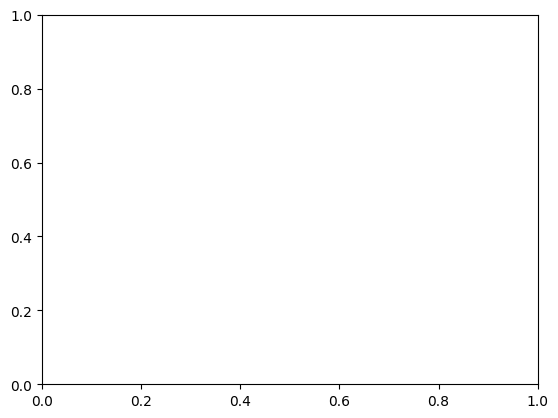

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# Assuming you have X_train_scaled, y_train, and gnb from your code

# Instead of selecting only the first two features, use PCA to reduce dimensionality while preserving information
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
X_plot = pca.fit_transform(X_train_scaled)

# Convert target to integers using a mapping
class_mapping = {'Monitoring': 0, 'Running': 1, 'Inspecting': 2}  # Replace with your actual class labels
y_plot = y_train.map(class_mapping).astype(int)  # Convert target to integers

# Plot decision boundaries
plot_decision_regions(X_plot, y_plot.values, clf=gnb, legend=2) #y_plot.values to avoid warning
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Naive Bayes Decision Boundaries (PCA)')
plt.show()

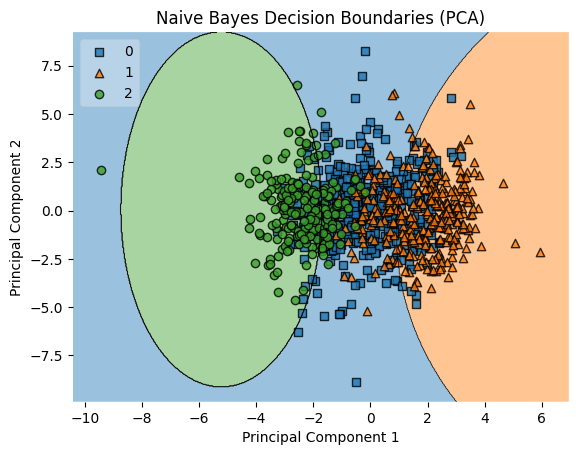

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# Assuming you have X_train_scaled, y_train, and gnb from your code

# Instead of selecting only the first two features, use PCA to reduce dimensionality while preserving information
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
X_plot = pca.fit_transform(X_train_scaled)

# Convert target to integers using a mapping
class_mapping = {'Monitoring': 0, 'Running': 1, 'Inspecting': 2}  # Replace with your actual class labels
y_plot = y_train.map(class_mapping).astype(int)  # Convert target to integers

# **Fit a new Gaussian Naive Bayes classifier on the PCA-transformed data**
gnb_pca = GaussianNB()  # Create a new instance of GaussianNB
gnb_pca.fit(X_plot, y_plot)  # Fit the new classifier using the PCA-transformed data

# Plot decision boundaries using the new classifier
plot_decision_regions(X_plot, y_plot.values, clf=gnb_pca, legend=2) #y_plot.values to avoid warning
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Naive Bayes Decision Boundaries (PCA)')
plt.show()